# Aim:
To PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [10]:
!pip install tensorflow




  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.54.2-cp310-cp310-win_amd64.whl (4.1 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached jax-0.4.10-py3-none-any.whl
  Using cached google_auth-2.19.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [13]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [14]:
df.drop(columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
                 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep'], 
        inplace=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [16]:
df.describe(include='all')


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,NaN


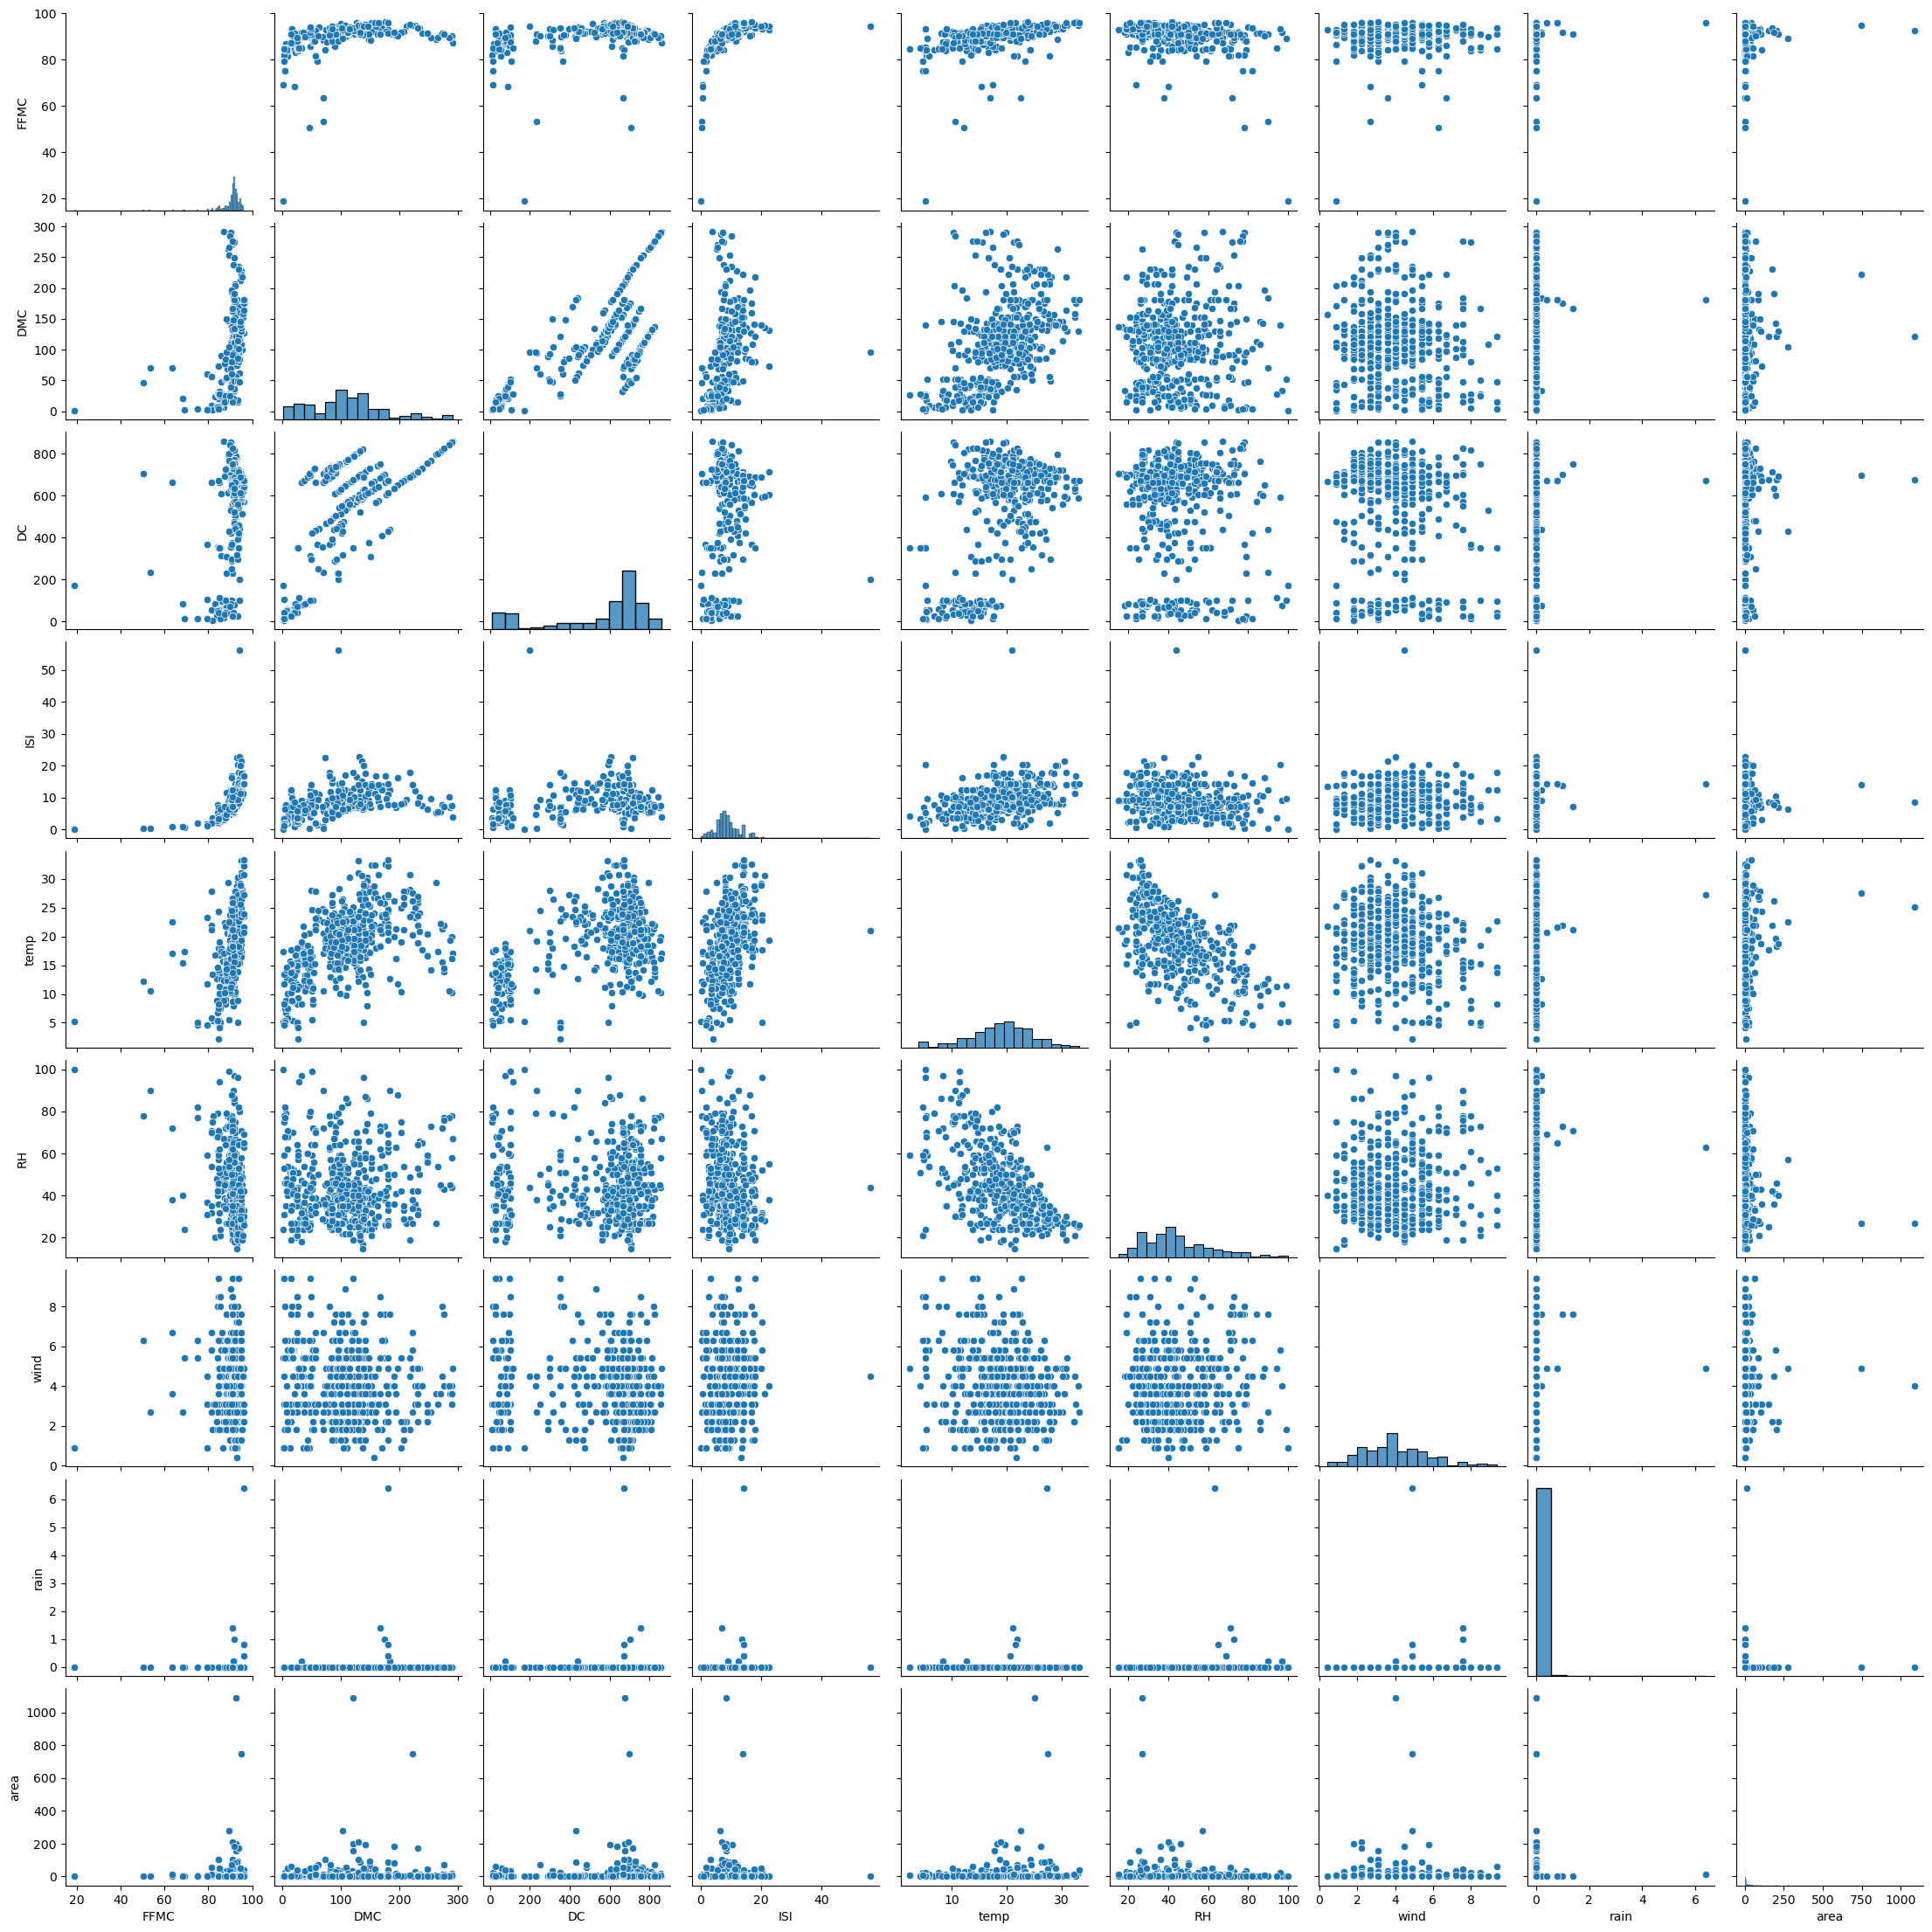

In [17]:
sns.pairplot(df)


In [18]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

<Axes: xlabel='size_category', ylabel='count'>

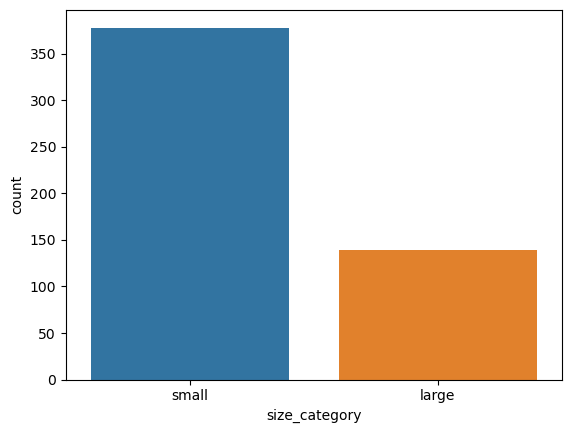

In [19]:
sns.countplot(x=df['size_category'])

In [20]:
df['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                   [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df['day'].replace(['mon','tue','wed','thu','fri','sat','sun'], [1,2,3,4,5,6,7], inplace=True)
df['size_category'].replace(['small', 'large'], [1,2], inplace=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,2
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [21]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

## Spliting data

In [22]:
x = df.iloc[:,:-1]
y = df['size_category']

In [23]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.96844301,  0.35772091, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 1.54991494, -1.09090867, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)


## Model building

In [25]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.1))
ann.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(0.1))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#Fit the data 
ann.fit(xtrain, ytrain, epochs=50, batch_size=10)

Epoch 1/50
42/42 [==============================] - 1s 2ms/step - loss: 0.6270 - accuracy: 0.7070
Epoch 2/50
42/42 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.7337
Epoch 3/50
42/42 [==============================] - 0s 2ms/step - loss: -0.0370 - accuracy: 0.7337
Epoch 4/50
42/42 [==============================] - 0s 2ms/step - loss: -0.5304 - accuracy: 0.7337
Epoch 5/50
42/42 [==============================] - 0s 2ms/step - loss: -1.1032 - accuracy: 0.7337
Epoch 6/50
42/42 [==============================] - 0s 2ms/step - loss: -1.8189 - accuracy: 0.7337
Epoch 7/50
42/42 [==============================] - 0s 2ms/step - loss: -2.8273 - accuracy: 0.7337
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: -4.0407 - accuracy: 0.7337
Epoch 9/50
42/42 [==============================] - 0s 2ms/step - loss: -5.6827 - accuracy: 0.7337
Epoch 10/50
42/42 [==============================] - 0s 2ms/step - loss: -7.7389 - accuracy: 0.7337
Epoch 11/50

In [26]:
ypred = ann.predict(xtest)
ypred

4/4 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [27]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        75
           2       0.00      0.00      0.00        29

    accuracy                           0.72       104
   macro avg       0.36      0.50      0.42       104
weighted avg       0.52      0.72      0.60       104

